

---

# **PREDICTION USING UNSUPERVISED MACHINE LEARNING**

## **AUTHOR - AKSHAYA RAJ S A**

---













# **IMPORTING LIBRARIES AND READING SAMPLE DATAFILE**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sample = pd.read_csv('Iris.csv')
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa




---


# **DATA EXPLORATION**


---



In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB




---


# **OUTLIER TREATMENT**


---



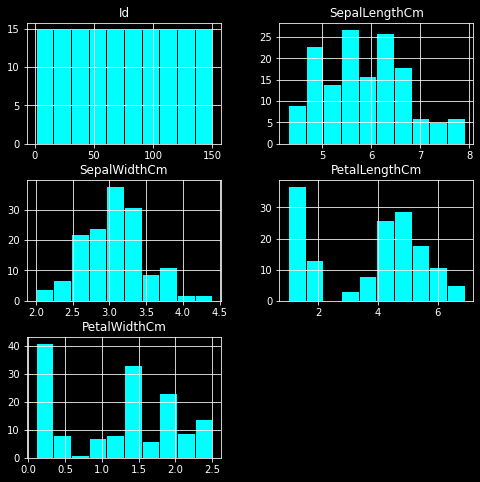

In [ ]:
plt.style.use("dark_background")
sample.hist(figsize=(8, 8),color='cyan',edgecolor='k')
plt.show()

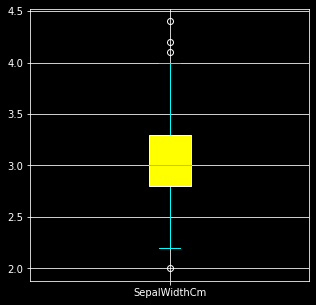

In [ ]:
sample.boxplot(column=['SepalWidthCm'],figsize=(5, 5),color='cyan',patch_artist=True,
            boxprops=dict(facecolor='yellow'))
plt.show()

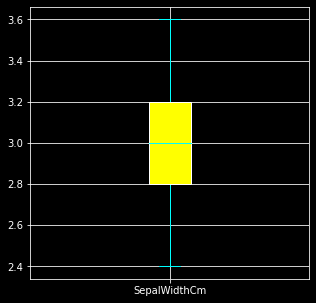

In [ ]:
sample['SepalWidthCm'] = np.where(sample['SepalWidthCm'] > sample['SepalWidthCm'].quantile(0.90) ,
                                  sample['SepalWidthCm'].quantile(0.50), sample['SepalWidthCm'])
sample['SepalWidthCm'] = np.where(sample['SepalWidthCm'] < sample['SepalWidthCm'].quantile(0.05) ,
                                  sample['SepalWidthCm'].quantile(0.50), sample['SepalWidthCm'])
sample.boxplot(column=['SepalWidthCm'],figsize=(5, 5), return_type='axes',color='cyan',patch_artist=True,
            boxprops=dict(facecolor='yellow'))
cluster = sample
plt.show()



---


# **ENCODING CATEGORICAL VARIABLE**



---




In [ ]:
dummies = pd.get_dummies(sample['Species'], prefix='Species')
sample = pd.concat([sample, dummies], axis=1)
sample.drop('Species', axis=1, inplace=True)
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0




---


# **DATA SCALING**


---



In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS
mms = MMS()
mms.fit(sample)
sample = mms.transform(sample)
print(sample)

[[0.         0.22222222 0.91666667 ... 1.         0.         0.        ]
 [0.00671141 0.16666667 0.5        ... 1.         0.         0.        ]
 [0.01342282 0.11111111 0.66666667 ... 1.         0.         0.        ]
 ...
 [0.98657718 0.61111111 0.5        ... 0.         0.         1.        ]
 [0.99328859 0.52777778 0.83333333 ... 0.         0.         1.        ]
 [1.         0.44444444 0.5        ... 0.         0.         1.        ]]




---


# **METHODS TO CALCULATE K**


---



# **ELBOW METHOD**


---



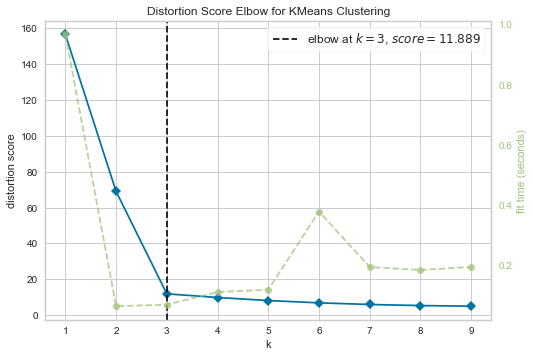

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans as KM
from yellowbrick.cluster import KElbowVisualizer as KV
model=KM()
elbow = KV(model,k=(1,10))
elbow.fit(sample)
elbow.poof()

#### **_USING SILHOUETTE INDEX_**

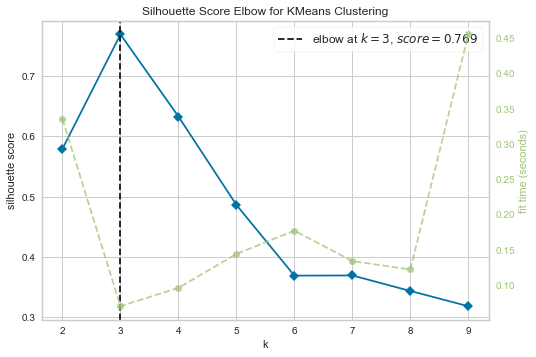

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KM(sample)
sil = KV(model, k=(2,10),metric='silhouette')
sil.fit(sample)       
sil.poof()

#### **_USING CALINSKI-HARABASZ INDEX_**

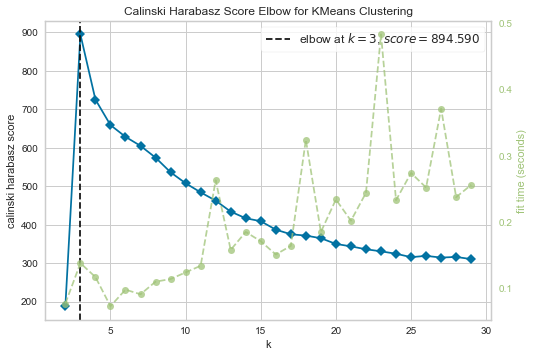

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
ch_index = KV(model, k=(2,30),metric='calinski_harabasz')
ch_index.fit(sample)       
ch_index.show()     





---



# **SILHOUETTE METHOD**


---



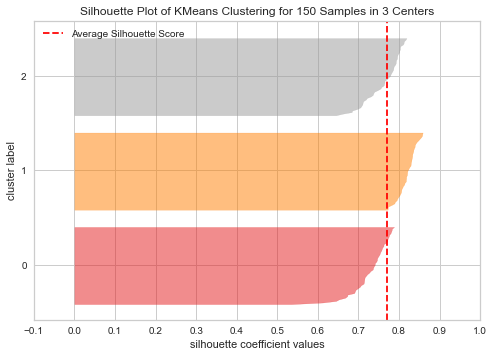

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer as SV
model= KM(3)
sil = SV(model)
sil.fit(sample)
sil.poof()



---


# **DENDROGRAM**


---



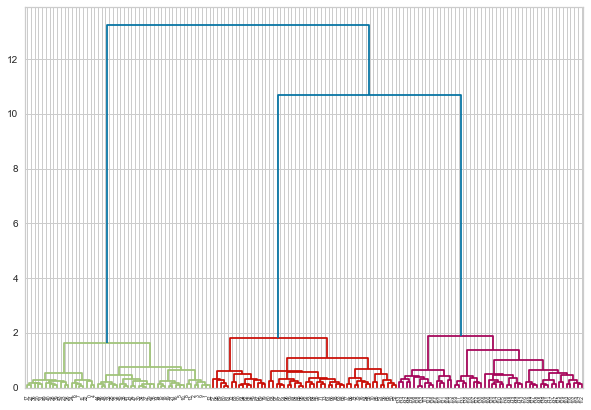

In [ ]:
import scipy.cluster.hierarchy as hier
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
dendrogram = hier.dendrogram(hier.linkage(sample, method='ward'))



---


# **CREATING K-MEANS CLASSIFIER**


---



In [ ]:
kmeans = KM(n_clusters= 3)
label = kmeans.fit_predict(sample)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


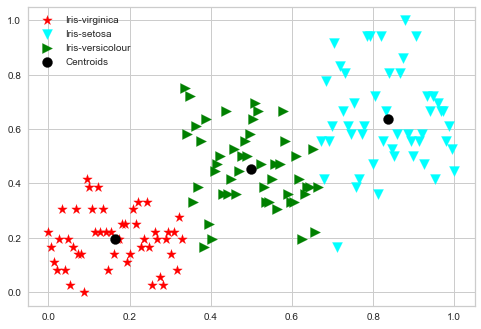

In [ ]:
label_0 = sample[label == 0]
label_1 = sample[label == 1]
label_2 = sample[label == 2]
plt.scatter(label_0[:,0] , label_0[:,1] ,marker= '*', s=100, color = 'red', label = 'Iris-virginica')
plt.scatter(label_1[:,0] , label_1[:,1] ,marker= 'v', s=100, color = 'cyan', label = 'Iris-setosa')
plt.scatter(label_2[:,0] , label_2[:,1] ,marker= '>', s=100, color = 'green', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'black', label = 'Centroids')
plt.legend()